20201215
solve magia record mental weight

In [1]:
import numpy as np
import time
#from itertools import combinations, permutations
import random

In [2]:
LL = lambda x: [[i] for i in x]#list the list

In [3]:
def II(result,iil,Nbr):
    '''
    iteration rapid increase
    iil: II List; Nbr: length of result
    To call it, II([[]],LL(range(1,point+2)),Nbr-1)
    '''
    result2=[]
    for x in iil:
        #print(result,iil)
        result2 += [subset + x for subset in result]
    if len(result2[0])==Nbr: return result2
    #collecting
    ALL=[]
    for the in result2:
        a=II([the],LL(range(max(the),iil[-1][0]+1)),Nbr)
        for a2 in a:
            ALL.append(a2)
    return ALL

In [4]:
def DP(point,Nbr):
    '''
    math, distribute points to diff Nbr subplots, from 0 to max. Nbr >=2, point >=2
    rep: re-calculate parameters.
    '''
    c=[]
    for i2 in II([[]],LL(range(1,point+2)),Nbr-1):
        d=[i2[0]-1]+list(np.diff(i2))+[point-i2[-1]+1]
        #f=d.copy()
        #f.reverse()
        c.append(d)
        #c.append(f)
        #temp=[]#remove repeated. https://blog.csdn.net/Jerry_1126/article/details/79843751
        #[temp.append(i) for i in c if not i in temp]
    return c#temp

In [5]:
data=np.loadtxt('KyoukoMS.csv','str',delimiter=',')

In [6]:
#data

In [7]:
#data[0,0]=data[0,0][1:]

In [8]:
data

array([['1', '0.007089241'],
       ['11', '0.02530228'],
       ['1110', '1'],
       ['112', '0.007610509'],
       ['112100', '0.008444537'],
       ['1121000', '0.009070058'],
       ['11220', '0.008444537'],
       ['112200', '0.009070058'],
       ['1122000', '0.013031693'],
       ['113', '0.007610509'],
       ['1131', '0.040483648'],
       ['113100', '0.008444537'],
       ['11310000', '0.013031693'],
       ['1132', '0.008027523'],
       ['1132000', '0.013031693'],
       ['120', '0.008'],
       ['1200', '0.008027523'],
       ['120000', '0.009070058'],
       ['1200000', '0.009070058'],
       ['130', '0.008'],
       ['1300', '0.008'],
       ['130000', '0.009070058'],
       ['1300000', '0.013031693'],
       ['1122', '0.003330382'],
       ['11310', '0.003535988'],
       ['13', '0.002868048'],
       ['111', '0.009610275'],
       ['1121', '0.009610275'],
       ['11210', '0.010274579'],
       ['1131000', '0.010806023'],
       ['11320', '0.010274579'],
       ['1132

# This is for 6 branches girl (e.g. Iroha) Don't just run it see if needed

In [10]:
# collapse

for i in range(len(data)):
    data[i,0]=str(int(data[i,0][0])%3+1)+data[i,0]

data = np.concatenate((data, [['1',9999],['2',9999],['3',9999]]), axis=0)

In [9]:
data

array([['1', '0.007089241'],
       ['11', '0.02530228'],
       ['1110', '1'],
       ['112', '0.007610509'],
       ['112100', '0.008444537'],
       ['1121000', '0.009070058'],
       ['11220', '0.008444537'],
       ['112200', '0.009070058'],
       ['1122000', '0.013031693'],
       ['113', '0.007610509'],
       ['1131', '0.040483648'],
       ['113100', '0.008444537'],
       ['11310000', '0.013031693'],
       ['1132', '0.008027523'],
       ['1132000', '0.013031693'],
       ['120', '0.008'],
       ['1200', '0.008027523'],
       ['120000', '0.009070058'],
       ['1200000', '0.009070058'],
       ['130', '0.008'],
       ['1300', '0.008'],
       ['130000', '0.009070058'],
       ['1300000', '0.013031693'],
       ['1122', '0.003330382'],
       ['11310', '0.003535988'],
       ['13', '0.002868048'],
       ['111', '0.009610275'],
       ['1121', '0.009610275'],
       ['11210', '0.010274579'],
       ['1131000', '0.010806023'],
       ['11320', '0.010274579'],
       ['1132

In [10]:
BM={}#branch memory weight
BMt={}# 's text
#DPd={}#distribution dictionary

In [11]:
def SB(data,Vl,point,weights,skipNbr=9999):
    '''
    data,verify letter (after check this plot), point unused (before check this plot), 
    weights gained from this point (after check this plot), comments added (from this plot)
    example: SB(data,'1','15',300,', the plot name is 1')
    skipNbr: if a weights is 9999, then weights = 0 and dont use point
    
    return: 1 or 0 is the if 'waste', if waste, the upper will record the result to increase the speed
    '''
    global BM, BMt
    
    if point>=4:
        if (Vl,point) in list(BM.keys()):
            return BM[(Vl,point)],BMt[(Vl,point)], 0
    
    #print(weights)
    if point==0: return 0, '', 0
    point -= 1
    if weights==skipNbr:#skip this plot
        point += 1
        weights = 0
    Vls=data[:,0]#verify letter list
    PSBL=[]#search branch list prepare (for distribution)
    SBL=[]#search branch list
    for i in range(len(Vls)):
        iV=Vls[i][:-1]#to compare
        if iV==Vl:#record weight distribution
            #iweights=
            #SBL.append(SB(data,Vls[i],point,weights+float(data[i,1]),co+','+Vls[i]))
            PSBL.append(i)
    #print(Vl,PSBL)
    if len(PSBL)==0:#no subplot
        return weights, ', '+Vl, 0#waste number (0 here) occurs when unnessensary SB() occurs
    elif len(PSBL)==1:#have 1 subplot
        #print(SB(data,Vls[PSBL[0]],point,float(data[PSBL[0],1])))
        [PSBLw, PSBLco, ifw]=SB(data,Vls[PSBL[0]],point,float(data[PSBL[0],1]))#if waste
        if ifw:
            if point>=3:
                BM[(Vls[PSBL[0]],point)]=PSBLw
                BMt[(Vls[PSBL[0]],point)]=PSBLco
        return weights+PSBLw, ', '+Vl+PSBLco, 0
    else:#start distribution
        if point==0: return weights, ', '+Vl,0#can not distribute
        if point==1:#simple distribute
            for i2 in PSBL:
                #print('i2')
                [i2a, i2b, i2c]=SB(data,Vls[i2],1,float(data[i2,1]))
                
                #if i2c:
                 #   if point>=9:
                  #      BM[Vls[i2]]=i2a
                   #     BMt[Vls[i2]]=i2b   one point and multiple branch is not waste
                        
                SBL.append([i2a, i2b])#deal with SBL with point>1
                ifw=0
        else:
            #print(point,PSBL)
            PL=DP(round(point),len(PSBL))#prepare the point list # this is the reason of waste
            for thePL in PL:
                thePLw=0
                thePLco=''
                for i4, i5 in zip(thePL, PSBL):
                    [i4a, i4b, i4c]=SB(data,Vls[i5],i4,float(data[i5,1]))
                    
                    if i4c:
                        if point>=3:
                            BM[(Vls[i5],i4)]=i4a
                            BMt[(Vls[i5],i4)]=i4b
                    
                    thePLw += i4a
                    thePLco = thePLco + i4b
                #print('i4')
                SBL.append([thePLw, thePLco])
            ifw=1
            
        #print(SBL)
        Cmax=max([choose[0] for choose in SBL])#check highest weight
        
        for i3 in SBL:
            if i3[0]==Cmax:
                i3a=weights+Cmax
                i3b=', '+Vl+i3[1]

                
                return i3a, i3b, 1

In [12]:
#SB(data,'1',11,0.004200672)

In [13]:
BM={}#branch memory weight
BMt={}# 's text

result=SB(data,'',60,9999)
#result=SB(data,'',60,9999)

In [14]:
print(result)

#or

#print(result.replace(' 1',' ').replace(' 2',' ').replace(' 3',' '))#if uses collapse

(1.9911924290000003, ', , 1, 11, 112, 1121, 11210, 112100, 1121000, 113, 1131, 11310, 113100, 1131000, 11310000, 1132, 11320, 113200, 1132000, 111, 1110, 12, 120, 1200, 12000, 120000, 1200000, 2, 22, 221, 2210, 22100, 21, 212, 2121, 2122, 21222, 211, 2110, 3, 31, 310, 3100, 31000, 32, 320, 3200, 32000, 320000, 33, 331, 3310, 33100, 331000, 3310000, 332, 3322, 3321, 33211, 332110, 3321100, 33212', 1)


In [34]:
#BM

My Kyouko:
(1.9911924290000003, ', , 1, 11, 112, 1121, 11210, 112100, 1121000, 113, 1131, 11310, 113100, 1131000, 11310000, 1132, 11320, 113200, 1132000, 111, 1110, 12, 120, 1200, 12000, 120000, 1200000, 2, 22, 221, 2210, 22100, 21, 212, 2121, 2122, 21222, 211, 2110, 3, 31, 310, 3100, 31000, 32, 320, 3200, 32000, 320000, 33, 331, 3310, 33100, 331000, 3310000, 332, 3322, 3321, 33211, 332110, 3321100, 33212', 1)

My Kaede:
(1.9040555929999998, ', , 1, 11, 112, 1120, 11201, 112010, 1120100, 11201000, 11202, 112020, 1120200, 11202000, 112020000, 111, 1111, 11110, 111100, 1111000, 11110000, 12, 120, 1200, 12000, 120000, 1200000, 12000000, 120000000, 13, 130, 1300, 13000, 2, 22, 221, 2211, 22110, 221100, 2211000, 22110000, 221100000, 222, 2220, 22201, 222010, 2220100, 22201000, 22202, 222020, 2220200, 22202000, 23, 230, 2300, 23000, 230000, 2300000, 23000000, 230000000, 21, 210', 1)


My HomuraG3:
(3.254315663,
6, 62, 620, 6200, 62000, 620000, 6200000, 61, 610, 6100, 61000, 610000,
1, 10, 103, 1030, 10300,
4, 40, 401, 4010, 403, 4030, 40300, 403000, 402, 4020,
5, 51, 511, 5110, 51100, 511000, 5110000, 52, 520, 5201, 52010, 520100, 5201000, 52010000, 5203, 52030, 520300, 5203000',
2, 23, 230, 2300, 23001, 230012, 2300120,
 1)
 


My Sayaka:

(3.080416398,
 ', , 
 1, 11, 112, 1120, 11200, 112000, 1120000, 111, 1110, 11100, 111000, 1110000, 11100000, 111000000, 12, 121, 1210, 12100, 121000, 1210000, 122, 1220, 12200, 122000, 
 2, 22, 21, 211, 2111, 21110, 211100, 2111000, 21110000, 2112, 21120, 212, 2120, 21200, 212000, 2120000, 21200000, 
 3, 31, 310, 3100, 32, 322, 3220, 32200, 322000, 3220000, 
 4, 42, 422, 41, 410, 4100, 41000, 410000, 4100000',
 1)
 
 
uncertained: (from old version)


My Homura Glass2: 4,  4,  8,  8, 10,  7
1 (0.063097892, ', , 1, 10, 101, 1010, 10100, 102')
2 (0.016822634, ', , 2, 23, 230, 2300, 23001, 230012, 2300120')
3 (0.049430203, ', , 3, 31, 310, 3100')
4 (0.056259655, ', , 4, 40, 403, 4030, 40300, 403000, 402, 4020')
5 (0.108498016, ', , 5, 51, 512, 5120, 511, 5110, 51100, 511000, 5110000, 52, 520, 5201, 5202, 52020, 520200, 5202000')
6 (0.103726234, ', , 6, 61, 610, 6100, 61000, 610000, 6100000, 62, 620, 6200, 62000, 620000')


My Homura Glass: 3,  6,  3,  8, 10, 12
1 0.067570727, ', , 1, 10, 102'
2 (0.045710023, ', , 2, 23, 230, 2300, 23001, 230012, 2300120, 23002, 230020, 2300200, 23002000')
3 (0.04688377, ', , 3, 31, 310')
4 (0.073082289, ', , 4, 40, 403, 4030, 40300, 403000, 402, 4020, 40200, 402000')
5 (0.09554173600000002, ', , 5, 51, 511, 5110, 51100, 511000, 5110000, 52, 520, 5201, 5202, 52020, 520200, 5202000')
6 (0.14263226, ', , 6, 61, 610, 6100, 61000, 610000, 6100000, 62, 620, 6200, 62000, 620000') (active all)


My Iroha: 9, 8, 3, 9, 9, 7
1 (0.070781878, ', , 1, 10, 101, 1010, 10100, 101000, 1010000, 102, 1020')
2 (0.059969647,', , 2, 21, 210, 2101, 21010, 23, 230, 2300, 23002, 230020, 2300200, 23002000')
3 (0.022994264, ', , 3, 31, 310')
4 (0.064607266, ', , 4, 40, 403, 4030, 40300, 403000, 402, 4020, 40200, 402000, 4020000') (active all)
5 (1.062347081, ', , 5, 52, 520, 5202, 52020, 520200, 5202000, 51, 512, 5120, 511, 5110, 51100, 511000, 5110000')
6 (0.046014549, ', , 6, 61, 610, 6100, 61000, 610000, 6100000')

Use below to do some random and statistic: 4 Branches and 20 points, need 4 min. 

In [83]:
Faster=np.array([range(1,5),[25, 25, 25, 25]])

In [84]:
Dic={}

In [85]:
for i in Faster[0]:
    Dic[i]=[]
    data2=[]
    for i3 in data:
        if i3[0][0]==str(i):
            data2.append(i3)
    for i2 in range(1,Faster[1][i-1]+1):
        t=time.time()
        Dic[i].append(SB(np.array(data2),'',i2,9999))
        print('Dictionary of branch '+str(i)+' in point '+str(i2)+' finishes uses '+str(time.time()-t)+' sec.\n')

Dictionary of branch 1 in point 1 finishes uses 0.0 sec.

Dictionary of branch 1 in point 2 finishes uses 0.0 sec.

Dictionary of branch 1 in point 3 finishes uses 0.0 sec.

Dictionary of branch 1 in point 4 finishes uses 0.0 sec.

Dictionary of branch 1 in point 5 finishes uses 0.0 sec.

Dictionary of branch 1 in point 6 finishes uses 0.0 sec.

Dictionary of branch 1 in point 7 finishes uses 0.0 sec.

Dictionary of branch 1 in point 8 finishes uses 0.0 sec.

Dictionary of branch 1 in point 9 finishes uses 0.0 sec.

Dictionary of branch 1 in point 10 finishes uses 0.0 sec.

Dictionary of branch 1 in point 11 finishes uses 0.0 sec.

Dictionary of branch 1 in point 12 finishes uses 0.0 sec.

Dictionary of branch 1 in point 13 finishes uses 0.0 sec.

Dictionary of branch 1 in point 14 finishes uses 0.0 sec.

Dictionary of branch 1 in point 15 finishes uses 0.0 sec.

Dictionary of branch 1 in point 16 finishes uses 0.0 sec.

Dictionary of branch 1 in point 17 finishes uses 0.01037406921386

In [86]:
Dic

{1: [(0.0108501, ', , 1', 0),
  (0.0217002, ', , 1, 11', 0),
  (0.034130412, ', , 1, 11, 111', 0),
  (0.174149373, ', , 1, 11, 111, 1110', 0),
  (0.187422311, ', , 1, 11, 111, 1110, 11100', 0),
  (0.206594332, ', , 1, 11, 111, 1110, 11100, 111000', 0),
  (0.22060465499999998, ', , 1, 11, 111, 1110, 11100, 111000, 1110000', 0),
  (0.26086919, ', , 1, 11, 111, 1110, 12, 121, 1210, 12100', 0),
  (0.27487951299999996,
   ', , 1, 11, 111, 1110, 12, 121, 1210, 12100, 121000',
   0),
  (0.29405153399999995,
   ', , 1, 11, 111, 1110, 12, 121, 1210, 12100, 121000, 1210000',
   0),
  (0.307324472,
   ', , 1, 11, 111, 1110, 11100, 12, 121, 1210, 12100, 121000, 1210000',
   0),
  (0.32649649299999994,
   ', , 1, 11, 111, 1110, 11100, 111000, 12, 121, 1210, 12100, 121000, 1210000',
   0),
  (0.340506816,
   ', , 1, 11, 111, 1110, 11100, 111000, 1110000, 12, 121, 1210, 12100, 121000, 1210000',
   0),
  (0.35230498299999996,
   ', , 1, 11, 111, 1110, 11100, 111000, 1110000, 12, 121, 1210, 12100, 1210

In [87]:
Faster[1]

array([25, 25, 25, 25])

In [91]:
BG=np.array([sum(Faster[1][:i]) for i in range(4)])#background

In [92]:
BG

array([ 0, 25, 50, 75])

In [93]:
for i in range(1,5):
    Dic[i].append([0])#a little skill

In [94]:
def R1():#random 1
    a=random.random()*100#the number here is the last of BG + the last of faster[1]
    return sum((a-BG)>0)

In [98]:
def R2():
    a=[]
    for i in range(60):#the number here is the point avaliable exluding 9999 (total minus 9999)
        a.append(R1())
    a=np.array(a)
    if sum(a==1)>25 or sum(a==2)>25 or sum(a==3)>25 or sum(a==4)>25:# or sum(a==5)>16 or sum(a==6)>12:
        return -9999,[1,1,1,1]
    CL=[sum(a==1), sum(a==2), sum(a==3),sum(a==4)]#check list
    W=0
    for i2 in range(1,5):
        W += Dic[i2][CL[i2-1]-1][0]
    return W,CL

# Need 15 min

In [99]:
%timeit for i in range(100): R2()

182 ms ± 19 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [34]:
WL=[]
CLL=[]
for i in range(700000): 
    a,b=R2()
    WL.append(a)
    CLL.append(b)

In [35]:
max(WL)

0.39783463399999996

In [36]:
WL=np.array(WL)
CLL=np.array(CLL)

CLL[WL==max(WL)]

array([[ 4,  2,  2,  6, 10,  7]])

In [24]:
len(WL)

500000

In [25]:
WL2=WL[WL!=-9999]

In [130]:
len(DP(60,3))

1891

Text(0, 0.5, 'Weight')

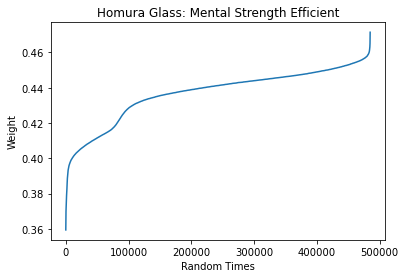

In [27]:
import matplotlib.pyplot as plt

plt.plot(np.sort(WL2,-1)[30:])
plt.title('Homura Glass: Mental Strength Efficient')
plt.xlabel('Random Times')
plt.ylabel('Weight')

In [220]:
a=', , 1, 16, 162, 1620, 16200, 162000, 1620000, 16200000, 161, 1610, 16100, 161000, 1610000, 2, 21, 210, 2103, 21030, 210300, 24, 240, 2401, 24010, 2403, 24030, 240300, 2403000, 2402, 24020, 3, 32, 323, 3230, 32300, 323001, 3230012, 32300120, 35, 351, 3511, 35110, 351100, 3511000, 35110000, 352, 3520, 35201, 352010, 3520100, 35201000, 352010000, 35203, 352030, 3520300, 35203000'

In [121]:
np.save('mgBMt.txt',BMt)

In [223]:
a.replace(' 1',' ').replace(' 2',' ').replace(' 3',' ')

', , , 6, 62, 620, 6200, 62000, 620000, 6200000, 61, 610, 6100, 61000, 610000, , 1, 10, 103, 1030, 10300, 4, 40, 401, 4010, 403, 4030, 40300, 403000, 402, 4020, , 2, 23, 230, 2300, 23001, 230012, 2300120, 5, 51, 511, 5110, 51100, 511000, 5110000, 52, 520, 5201, 52010, 520100, 5201000, 52010000, 5203, 52030, 520300, 5203000'